# 04.02 models

##### code, support for section text

In [5]:
if True: # settings for the people
  import matplotlib.pyplot as plt
  import numpy as np
  import pandas as pd
  from tabulate import tabulate

  pd.set_option('display.max_rows',10)


###### code, examples

In [8]:
# example 06: uses basic least squares

def eg_06():
  p_per = lambda cs,t: cs[0] + cs[1]*np.cos(2*np.pi*t) + cs[2]*np.sin(2*np.pi*t)
  s_per = lambda cs: f"{cs[0]:.2f} {cs[1]:+.2f}cos2πt {cs[2]:+.2f}sin2πt"

  xs_offset = 24 # hours in one period
  h = 0.125
  xs = np.arange(0,1,h)
  ys = np.array([-2.2,-2.8,-6.1,-3.9,0.0,1.1,-0.6,-1.1]) # b

  nk = len(ys) # knowns
  nu = 3 # unknowns
  a = np.ones((nk,nu))
  for i in range(nk):
    a[i,1] = np.cos(2*np.pi*xs[i])
    a[i,2] = np.sin(2*np.pi*xs[i])
  lhs = a.T @ a
  rhs = a.T @ ys
  cs = np.linalg.solve(lhs,rhs)

  xs_dis = np.linspace(0,1,25) # display interval
  ps_lsq = p_per(cs,xs_dis) # y = p(x) over interval

  # for residual
  pr_lsq = p_per(cs,xs)
  se = 0;m = nk # equations
  for i,ymod in enumerate(pr_lsq):
    se += pow(ys[i]-ymod,2)
  rmse = np.sqrt(se/m)

  # revert offset # here in case plot via pandas
  xs = xs*xs_offset
  xs_dis = xs_dis*xs_offset

  if True: # plot
    # plot, cfg
    plt.close("all")

    # plot, data
    plt.scatter(xs,ys,c="C0",marker="o",label="some data")
    plt.scatter(xs,pr_lsq,c="C1",marker=".")
    plt.plot(xs_dis,ps_lsq,c="C1",linestyle=":",label=s_per(cs))

    # plot, lines between
    for i,x in enumerate(xs):
      if i==0:
        plt.plot([x,x],[ys[i],pr_lsq[i]],c="C2",linestyle="-",label="residual")
      else:
        plt.plot([x,x],[ys[i],pr_lsq[i]],c="C2",linestyle="-")

    # plot, style, data point labels
    offset = (max(xs)-min(xs))/50
    sxy = []
    for i,x in enumerate(xs):
      sxy.append(f"({xs[i]},{ys[i]})")
    for i,label in enumerate(sxy):
      plt.text(xs[i]+offset,ys[i]+offset,label)

    # plot, style
    plt.title("\nleast squares for some data\n")
    plt.legend(bbox_to_anchor=(1.02,1),loc='upper left',borderaxespad=0)
    plt.ylabel("T (°C)")
    plt.xlabel("24H Day of 2001 January 01")

    # plot, display
    plt.show()

  if True: # dataframe
    # pandas dataframe # only for 4 data points so "xs"
    ps = np.full((xs.size,4),np.nan) # cols = t,T,model,error
    ps[:,0] = xs
    ps[:,1] = ys
    ps[:,2] = pr_lsq
    ps[:,3] = ps[:,1] - ps[:,2]
    nCol = ["t","y","model","error"] # pandas can use latex, i guess?
    df = pd.DataFrame(data=ps,columns=nCol)
    df["error"] = df["error"].apply("{:.4f}".format)
    display(df)

  if True: # error
    print(f"\nLHS:\n{lhs}")
    print(f"\nRHS:  {rhs}")
    print(f"\n[c]:  {cs}")
    print(f"\nSE: {se}")
    print(f"RMSE: {rmse}\n")


In [ ]:
# during lecture, ok? (maybe)

#  # data for example 07
#  p_per = lambda cs,t: cs[0] + cs[1]*np.cos(2*np.pi*t) + \
#            cs[2]*np.sin(2*np.pi*t) + cs[3]*np.cos(4*np.pi*t)
#  s_per = lambda cs: f"{cs[0]:.2f} {cs[1]:+.2f}cos2πt {cs[2]:+.2f}sin2πt {cs[1]:+.2f}cos4πt"

# 01 copy-pasted previous code cell for example 06
# 02 renamed pasted code cell to example 07
# 03 replaced lines 08,09 with p_per,s_per above
# 04 updated line 16→17 for 4th term: "nu = 3" to "nu = 4"
# 05 added 4th term to first for-loop: "a[i,3] = np.cos(4*np.pi*xs[i])"
#
# nothing else needs to change - no labels, no anything - bc only model changed


In [13]:
# example 07: uses basic least squares

def eg_07():

  p_per = lambda cs,t: cs[0] + cs[1]*np.cos(2*np.pi*t) + \
            cs[2]*np.sin(2*np.pi*t) + cs[3]*np.cos(4*np.pi*t)
  s_per = lambda cs: f"{cs[0]:.2f} {cs[1]:+.2f}cos2πt {cs[2]:+.2f}sin2πt {cs[1]:+.2f}cos4πt"

  xs_offset = 24 # hours in one period
  h = 0.125
  xs = np.arange(0,1,h)
  ys = np.array([-2.2,-2.8,-6.1,-3.9,0.0,1.1,-0.6,-1.1]) # b

  nk = len(ys) # knowns
  nu = 4 # unknowns
  a = np.ones((nk,nu))
  for i in range(nk):
    a[i,1] = np.cos(2*np.pi*xs[i])
    a[i,2] = np.sin(2*np.pi*xs[i])
    a[i,3] = np.cos(4*np.pi*xs[i])
  lhs = a.T @ a
  rhs = a.T @ ys
  cs = np.linalg.solve(lhs,rhs)

  xs_dis = np.linspace(0,1,25) # display interval
  ps_lsq = p_per(cs,xs_dis) # y = p(x) over interval

  # for residual
  pr_lsq = p_per(cs,xs)
  se = 0;m = nk # equations
  for i,ymod in enumerate(pr_lsq):
    se += pow(ys[i]-ymod,2)
  rmse = np.sqrt(se/m)

  # revert offset # here in case plot via pandas
  xs = xs*xs_offset
  xs_dis = xs_dis*xs_offset

  if True: # plot
    # plot, cfg
    plt.close("all")

    # plot, data
    plt.scatter(xs,ys,c="C0",marker="o",label="some data")
    plt.scatter(xs,pr_lsq,c="C1",marker=".")
    plt.plot(xs_dis,ps_lsq,c="C1",linestyle=":",label=s_per(cs))

    # plot, lines between
    for i,x in enumerate(xs):
      if i==0:
        plt.plot([x,x],[ys[i],pr_lsq[i]],c="C2",linestyle="-",label="residual")
      else:
        plt.plot([x,x],[ys[i],pr_lsq[i]],c="C2",linestyle="-")

    # plot, style, data point labels
    offset = (max(xs)-min(xs))/50
    sxy = []
    for i,x in enumerate(xs):
      sxy.append(f"({xs[i]},{ys[i]})")
    for i,label in enumerate(sxy):
      plt.text(xs[i]+offset,ys[i]+offset,label)

    # plot, style
    plt.title("\nleast squares for some data\n")
    plt.legend(bbox_to_anchor=(1.02,1),loc='upper left',borderaxespad=0)
    plt.ylabel("T (°C)")
    plt.xlabel("24H Day of 2001 January 01")

    # plot, display
    plt.show()

  if True: # dataframe
    # pandas dataframe # only for 4 data points so "xs"
    ps = np.full((xs.size,4),np.nan) # cols = t,T,model,error
    ps[:,0] = xs
    ps[:,1] = ys
    ps[:,2] = pr_lsq
    ps[:,3] = ps[:,1] - ps[:,2]
    nCol = ["t","y","model","error"] # pandas can use latex, i guess?
    df = pd.DataFrame(data=ps,columns=nCol)
    df["error"] = df["error"].apply("{:.4f}".format)
    display(df)

  if True: # error
    print(f"\nLHS:\n{lhs}")
    print(f"\nRHS:  {rhs}")
    print(f"\n[c]:  {cs}")
    print(f"\nSE: {se}")
    print(f"RMSE: {rmse}\n")


In [18]:
# example 08: uses polyfit

def eg_08():

  y_lin = lambda cs,x: cs[0]*np.exp(cs[1]*x)
  s_lin = lambda cs: f"{cs[0]:.4f}·e^({cs[1]:+.4f}x)"
  s_x = s_xs = "year"
  s_ys = "cars"
  s_y = s_ys + " (M)"

  xs_offset = 1950
  h = 5
  xs = np.arange(0,31,h) # [1950,1980]
  ys = np.array([53.05,73.04,98.31,139.78,193.48,260.20,320.39]) # b

  ck = np.polyfit(xs,np.log(ys),deg=1) # returns [c2,k=ln(c1)]
  cs = np.array([np.exp(ck[1]),ck[0]]) # reordered,translated [ck]

  xs_dis = np.linspace(min(xs),max(xs),(len(xs)-1)*h+1) # display interval
  ys_lin = y_lin(cs,xs_dis) # linearized model over interval
  yi_lin = y_lin(cs,xs)     # linearized model at data x[i]

  # revert offset # here in case plot via pandas
  xs = xs + xs_offset
  xs_dis = xs_dis + xs_offset

  if True: # plot
    # plot, data
    plt.scatter(xs,ys,c="C0",marker="o",label="some data")
    plt.scatter(xs,yi_lin,c="C1",marker="*")
    plt.plot( xs_dis,ys_lin,c="C1",linestyle=":", \
              label="$"+s_lin(cs).replace("(","{").replace(")","}")+"$")

    # plot, style
    plt.title("\nso many " + s_ys + ", so little time\n")
    plt.legend(bbox_to_anchor=(1.02,1),loc='upper left',borderaxespad=0)
    plt.xlabel(s_x)
    plt.ylabel(s_y)

    # plot, display
    plt.show()

  if True: # table
    # pandas dataframe # only for 4 data points so "xs"
    ps = np.full((xs.size,4),np.nan) # cols = t,T,model,error
    ps[:,0] = xs
    ps[:,1] = ys
    ps[:,2] = yi_lin
    ps[:,3] = ps[:,1] - ps[:,2]
    nCol = [s_xs,s_ys,"model","error"] # pandas can use latex, i guess?
    df = pd.DataFrame(data=ps,columns=nCol) # populate dataframe
    df["error"] = df["error"].apply("{:.4f}".format) # format column, error
    df[s_xs] = df[s_xs].apply("{:.0f}".format) # format column, time
    display(df)

  if True: # coeffs
    print(f"\ncoeffs: [c,k] = {ck[1]:.4f},{ck[0]:.4f} → y(x) = {s_lin(cs)}\n")


In [ ]:
# during lecture (maybe)

#  xs = np.array([1,2,3,4,5,6,7,8])
#  ys = np.array([8.0,12.3,15.5,16.8,17.1,15.8,15.2,14.0])
#  s_lin = lambda cs: f"{cs[0]:.4f}t·e^({cs[1]:+.4f}x)"

# 01 copy-pasted previous code cell for example 09
# 02 renamed pasted code cell to example 11
# 03 replaced data: lines 14-15 with lines 03-04 above
# 04 removed offset, line 12
# 05 updated model, line 18
# 06 updated descriptor: replaced line 10 with line 05 above
# 07 update labels from (cpu) transistors to drugs


In [20]:
# example 11: uses polyfit

def eg_11():
  # model
  y_lin = lambda cs,x: cs[0]*x*np.exp(cs[1]*x)
  s_lin = lambda cs: f"{cs[0]:.4f}t·e^({cs[1]:+.4f}t)"
  s_ys = "drugs"
  s_y = s_ys

  # prob
  h = 1
  xs = np.array([1,2,3,4,5,6,7,8])
  ys = np.array([8.0,12.3,15.5,16.8,17.1,15.8,15.2,14.0])

  # calc
  ck = np.polyfit(xs,np.log(ys)-np.log(xs),deg=1) # returns [c2,k=ln(c1)]
  cs = np.array([np.exp(ck[1]),ck[0]]) # reordered,translated [ck]
  sf = s_lin(cs)

  # data, display
  xs_dis = np.linspace(min(xs),max(xs)*2,(len(xs)*2-1)*h+1) # display interval
  ys_lin = y_lin(cs,xs_dis) # linearized model over interval
  yi_lin = y_lin(cs,xs) # linearized model at data x[i]

  if True: # plot
    # plot, data
    plt.scatter(xs,ys,c="C0",marker="o",label="some data")
    plt.scatter(xs,yi_lin,c="C1",marker="*")
    plt.plot(xs_dis,ys_lin,c="C1",linestyle=":",label=sf)

    # plot, style
    plt.title("\nso many " + s_ys + ", so little time\n")
    plt.legend(bbox_to_anchor=(1.02,1),loc='upper left',borderaxespad=0)
    plt.xlabel("year")
    plt.ylabel(s_y)
    if False:
      plt.loglog()
      ax = plt.gca()
      ax.xaxis.set_minor_formatter(mticker.ScalarFormatter())

    # plot, display
    plt.show()

  if True: # pandas
    # pandas dataframe # only for 4 data points so "xs"
    ps = np.full((xs.size,4),np.nan) # cols = t,T,model,error
    ps[:,0] = xs
    ps[:,1] = ys
    ps[:,2] = yi_lin
    ps[:,3] = ps[:,1] - ps[:,2]
    nCol = ["year",s_ys,"model","error"] # pandas can use latex, i guess?
    df = pd.DataFrame(data=ps,columns=nCol) # populate dataframe
    df["error"] = df["error"].apply("{:.4f}".format) # format column, error
    df["year"] = df["year"].apply("{:.0f}".format) # format column, time
    display(df)

  if True: # coeffs
    print(f"\ncoeffs: [c,k] = {ck[1]:.4f},{ck[0]:.4f} → y(x) = {sf}\n")


## 0 intro

aside from linear and polynomial models, consider periodic data and linearization.

## 1 periodic data

periodic models for periodic data, lets say.

##### example 06

fit temperature log to a periodic model. below is the data for dc at the millenium rollover.

TOD|Δt|T (°C)
-|-|-
12mn|0|-2.2
3am|$\frac{1}{8}$|-2.8
6am|$\frac{1}{4}$|-6.1
9am|$\frac{3}{8}$|-3.9
12nn|$\frac{1}{2}$|0.0
3pm|$\frac{5}{8}$|1.1
6pm|$\frac{3}{4}$|-0.6
9pm|$\frac{7}{8}$|-1.1

choose model $y=c_1 + c_2\text{ }cos\text{ }2\pi t + c_3\text{ }sin\text{ }2\pi t$ with period 24h.

\begin{align}
  c_1 + c_2\text{ }cos\text{ }2\pi(0) + c_3\text{ }sin\text{ }2\pi(0) &= -2.2 \\
  c_1 + c_2\text{ }cos\text{ }2\pi(\frac{1}{8}) + c_3\text{ }sin\text{ }2\pi(\frac{1}{8}) &= -2.8 \\
  c_1 + c_2\text{ }cos\text{ }2\pi(\frac{1}{4}) + c_3\text{ }sin\text{ }2\pi(\frac{1}{4}) &= -6.1 \\
  c_1 + c_2\text{ }cos\text{ }2\pi(\frac{3}{8}) + c_3\text{ }sin\text{ }2\pi(\frac{3}{8}) &= -3.9 \\
  c_1 + c_2\text{ }cos\text{ }2\pi(\frac{1}{2}) + c_3\text{ }sin\text{ }2\pi(\frac{1}{2}) &= 0.0 \\
  c_1 + c_2\text{ }cos\text{ }2\pi(\frac{5}{8}) + c_3\text{ }sin\text{ }2\pi(\frac{5}{8}) &= 1.1 \\
  c_1 + c_2\text{ }cos\text{ }2\pi(\frac{3}{4}) + c_3\text{ }sin\text{ }2\pi(\frac{3}{4})&= -0.6 \\
  c_1 + c_2\text{ }cos\text{ }2\pi(\frac{7}{8}) + c_3\text{ }sin\text{ }2\pi(\frac{7}{8}) &= -1.1 \\
  \\
  &\Downarrow \\
  \\
  A = \begin{bmatrix}
    1 & cos0 & sin0 \\ 1 & cos \frac{\pi}{4} & sin \frac{\pi}{4} \\
    1 & cos\frac{\pi}{2} & sin\frac{\pi}{2} \\
    1 & cos \frac{3\pi}{4} & sin \frac{3\pi}{4} \\
    1 & cos\pi & sin\pi \\
    1 & cos \frac{5\pi}{4} & sin \frac{5\pi}{4} \\
    1 & cos\frac{3\pi}{2} & sin\frac{3\pi}{2} \\
    1 & cos \frac{7\pi}{4} & sin \frac{7\pi}{4} \\
  \end{bmatrix} = \begin{bmatrix}
    1 & 1 & 0 \\ 1 & \frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2} \\
    1 & 0 & 1 \\ 1 & -\frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2} \\
    1 & -1 & 0 \\ 1 & -\frac{\sqrt{2}}{2} & -\frac{\sqrt{2}}{2} \\
    1 & 0 & -1 \\ 1 & \frac{\sqrt{2}}{2} & -\frac{\sqrt{2}}{2} \\
  \end{bmatrix}, &\text{ }b = \begin{bmatrix}
    -2.2 \\ -2.8 \\ -6.1 \\ -3.9 \\ 0.0 \\1.1 \\ -0.6 \\ -1.1
  \end{bmatrix} \\
  \\
  &\Downarrow \\
  \\
  A^TAc = \begin{bmatrix}
    8 & 0 & 0 \\ 0 & 4 & 0 \\ 0 & 0 & 4
  \end{bmatrix}\begin{bmatrix} c_1 \\ c_2 \\ c_3 \end{bmatrix}
  &= \begin{bmatrix} -15.6 \\ -2.9778 \\ -10.2376 \end{bmatrix} \\
  \\
  &\Downarrow \\
  \\
  c = \begin{bmatrix} c_1 \\ c_2 \\ c_3 \end{bmatrix}
  &= \begin{bmatrix} -1.95 \\ -0.7445 \\ -2.5594 \end{bmatrix} \\
  \\
  &\Downarrow \\
  \\
  y &= -0.19500 -0.7445\text{ }cos\text{ }2\pi t - 2.5594\text{ }sin\text{ }2\pi t,\\
  RMSE &\approx 1.063.
\end{align}

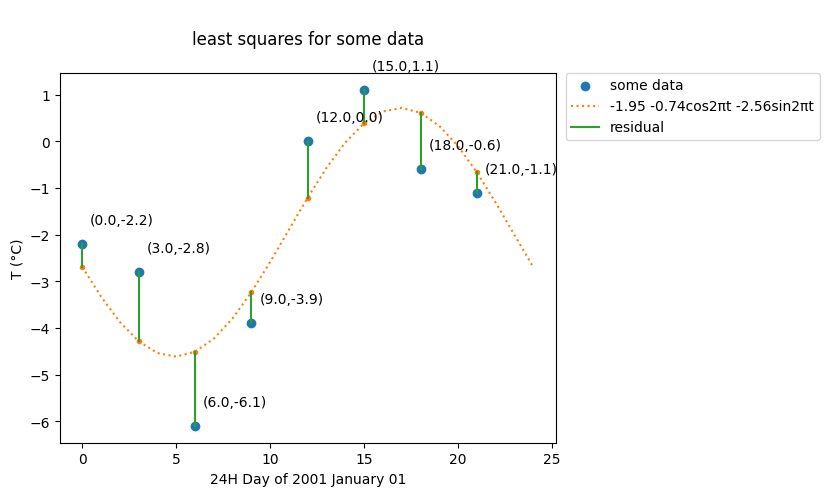

,t,y,model,error
0,0.0,-2.2,-2.694454,0.4945
1,3.0,-2.8,-4.286181,1.4862
2,6.0,-6.1,-4.509404,-1.5906
3,9.0,-3.9,-3.233363,-0.6666
4,12.0,0.0,-1.205546,1.2055
5,15.0,1.1,0.386181,0.7138
6,18.0,-0.6,0.609404,-1.2094
7,21.0,-1.1,-0.666637,-0.4334



LHS:
[[ 8.00000000e+00 -5.55111512e-16 -2.22044605e-16]
 [-5.55111512e-16  4.00000000e+00  3.43213444e-16]
 [-2.22044605e-16  3.43213444e-16  4.00000000e+00]]

RHS:  [-15.6         -2.97781746 -10.23761543]

[c]:  [-1.95       -0.74445436 -2.55940386]

SE: 9.040958351402141
RMSE: 1.0630709261028954



In [14]:
eg_06()

##### example 07

example 06 continued with better model. $\rightarrow$

choose model $y=c_1 + c_2\text{ }cos\text{ }2\pi t + c_3\text{ }sin\text{ }2\pi t + c_4\text{ }cos\text{ }4\pi t$ with period 24h.

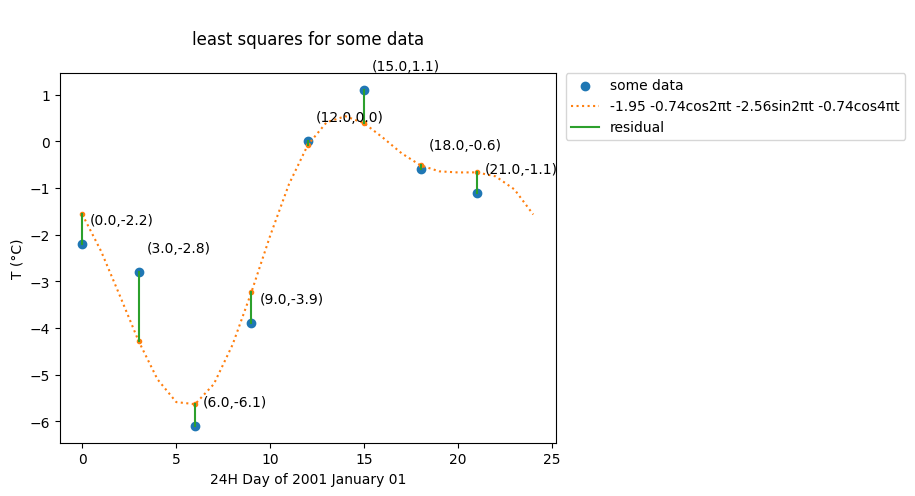

,t,y,model,error
0,0.0,-2.2,-1.569454,-0.6305
1,3.0,-2.8,-4.286181,1.4862
2,6.0,-6.1,-5.634404,-0.4656
3,9.0,-3.9,-3.233363,-0.6666
4,12.0,0.0,-0.080546,0.0805
5,15.0,1.1,0.386181,0.7138
6,18.0,-0.6,-0.515596,-0.0844
7,21.0,-1.1,-0.666637,-0.4334



LHS:
[[ 8.00000000e+00 -5.55111512e-16 -2.22044605e-16 -4.28626380e-16]
 [-5.55111512e-16  4.00000000e+00  3.43213444e-16 -3.35876614e-16]
 [-2.22044605e-16  3.43213444e-16  4.00000000e+00  8.10400148e-17]
 [-4.28626380e-16 -3.35876614e-16  8.10400148e-17  4.00000000e+00]]

RHS:  [-15.6         -2.97781746 -10.23761543   4.5       ]

[c]:  [-1.95       -0.74445436 -2.55940386  1.125     ]

SE: 3.9784583514021388
RMSE: 0.7052001800377445



In [15]:
eg_07()

## 2 data linearization

so about the lemming situation. the first part looks something like this:

$$y = c_1e^{c_2t}.$$

(the second part looks like $y_{\text{cliff}} = 2$, but lets not scare small children. today.)

least squares doesnt look like it will be ok with that but its nothing natural logs cant flatten.

$$ln\text{ }y = ln(c_1e^{c_2t}) = ln\text{ }c_1 + c_2t.$$

with $k=ln\text{ }c_1$,

$$k + c_2t, \quad c_1 = e^k.$$

is that ok? its ok-ish = its ok enough.

if youre the supreme court and afraid of someone (with money) suing (instead of sharing with) you (or whatever it is they think theyre doing), you expect least squares find $c_1,c_2$ to minimize

$$(c_1e^{c_2t_1} - y_1)^2 + \dots + (c_1e^{c_2t_m} - y_m)^2, \quad i = 1,\dots,m.$$

and the translated problem minimizes

$$(ln\text{ }c_1+c_2t_1 - y_1)^2 + \dots + (ln\text{ }c_1 + c_2t_m - y_m)^2, \quad i = 1,\dots,m$$

which results in a different $c_1,c_2$.

##### example 08

use model linearization to find best least squares exponential fit to the following world automobile supply data.

year|cars (M)
-|-:
1950|53.05
1955|73.04
1960|98.31
1965|139.78
1970|193.48
1975|260.20
1980|320.39

$$
k + c2t = ln\text{ }y
\quad\Rightarrow\quad
\begin{bmatrix}
  1 & 1950-1950 = 0 \\ \vdots & \vdots \\ 1 & 1980-1950 = 30
\end{bmatrix}
\begin{bmatrix} k=ln\text{ }c_1 \\ c_2 \end{bmatrix}
=
\begin{bmatrix} ln(53.05) \\ \vdots \\ ln(320.39) \end{bmatrix},
$$

where $t \equiv \Delta t$ from 1950.

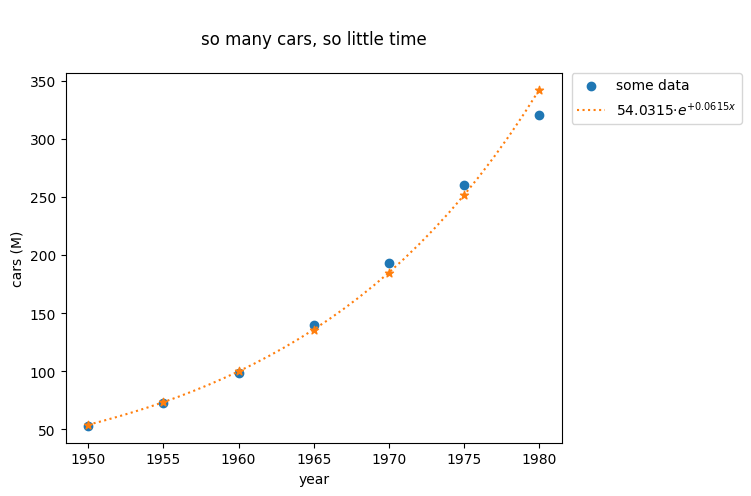

,year,cars,model,error
0,1950,53.05,54.031463,-0.9815
1,1955,73.04,73.491388,-0.4514
2,1960,98.31,99.959982,-1.6500
3,1965,139.78,135.961481,3.8185
4,1970,193.48,184.929249,8.5508
5,1975,260.20,251.533205,8.6668
6,1980,320.39,342.125184,-21.7352



coeffs: [c,k] = 3.9896,0.0615 → y(x) = 54.0315·e^(+0.0615x)



In [19]:
eg_08()

##### example 09 that one law

fit model $y=c_1e^{c_2t}$ to transistor count on intel CPUs.

CPU|year|transistors
-|-|-:
4004|1971|2250
8008|1972|2500
8080|1974|5000
8086|1978|29000
286|1982|120000
386|1985|275000
486|1989|1180000
Pentium|1993|3100000
Pentium II|1997|7500000
Pentium III|1999|24000000
Pentium 4|2000|42000000
Itanium|2002|220000000
Itanium 2|2003|410000000

$$
k + c2t = ln\text{ }y
\quad\Rightarrow\quad
\begin{bmatrix}
  1 & 1971-1970 = 1 \\ \vdots & \vdots \\ 1 & 2003-1970 = 33
\end{bmatrix}
\begin{bmatrix} k=ln\text{ }c_1 \\ c_2 \end{bmatrix}
=
\begin{bmatrix} ln(2250) \\ \vdots \\ ln(410000000) \end{bmatrix},
$$

where $t \equiv \Delta$ year from 1970.

$$
A^TAx = A^Tb
\quad\Rightarrow\quad
\begin{bmatrix} 13 & 235 \\ 235 & 5927 \end{bmatrix}
\begin{bmatrix} k \\ c_2 \end{bmatrix} =
\begin{bmatrix} 176.90 \\ 3793.23 \end{bmatrix},
$$

which has solution $k \approx 7.197$, $c_2 \approx 0.3546 \Rightarrow y = 1335.3\text{ }e^{0.3546t}$. gordon c moore, cofounder of intel, predicted the doubling law, $\Delta\text{ }t = \frac{ln\text{ }2}{c_2} \approx 1.95$ years, tho it seems to have accelerated after you were born.

###### code

In [ ]:
# during lecture, ok?

#  xs_yy_offset = 1970
#  h = 1
#  xs = np.array([1,2,4,8,12,15,19,23,27,29,30,32,33])
#  ys = np.array([2250,2500,5000,29000,120000,275000,1180000,3100000, \
#                  7500000,24000000,42000000,220000000,410000000]) # b

# 01 copy-pasted previous code cell for example 08
# 02 renamed pasted code cell to example 09
# 03 replaced lines 11-14 with lines 04-08 above
#
# 04 switch to log scale
#    add import statement: "import matplotlib.ticker as mticker"
#    before "plt.show()", add lines
#      plt.loglog()
#      ax = plt.gca()
#      ax.xaxis.set_minor_formatter(mticker.ScalarFormatter())
#
# 05 update labels from cars to (cpu) transistors
#
# 06 added moores law: moore = lambda y,t: y*pow(2,t/2)



coeffs: [c,k] = 7.1969,0.3546 → y(x) = 1335.3424·e^(0.3546x)



,year,transistors,model,error,moores,err2
0,1971,2250.0,1.903754e+03,346.2461,3.210383e+03,-960.3832
1,1972,2500.0,2.714120e+03,-214.1197,4.580693e+03,-2080.6935
2,1974,5000.0,5.516522e+03,-516.5220,9.325668e+03,-4325.6679
3,1978,29000.0,2.278967e+04,6210.3281,3.865248e+04,-9652.4807
4,1982,120000.0,9.414793e+04,25852.0665,1.602045e+05,-40204.5326
5,1985,275000.0,2.728132e+05,2186.8303,4.653694e+05,-190369.4495
6,1989,1180000.0,1.127037e+06,52963.3194,1.928836e+06,-748835.9699
7,1993,3100000.0,4.655976e+06,-1555976.3992,7.994526e+06,-4894526.0755
8,1997,7500000.0,1.923461e+07,-11734614.6333,3.313524e+07,-25635242.2759
9,1999,24000000.0,3.909488e+07,-15094876.8385,6.745884e+07,-43458839.2157


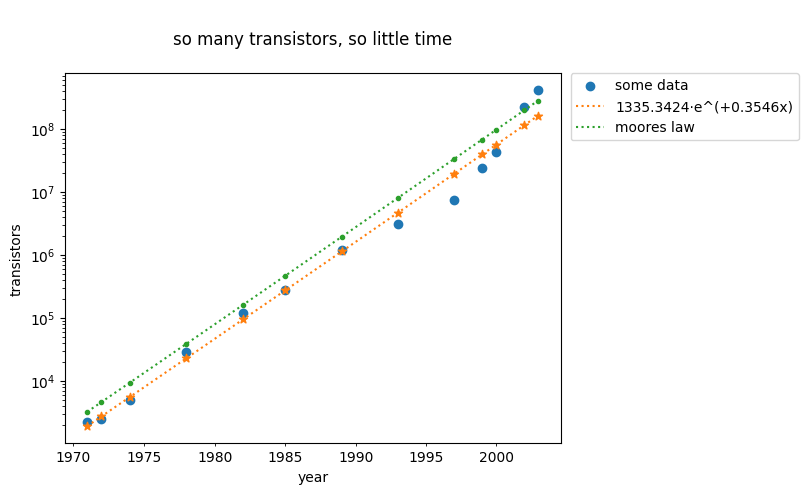

In [ ]:
# example 09: uses polyfit

if __name__ == "__main__":
  import numpy as np

  y_lin = lambda cs,x: cs[0]*np.exp(cs[1]*x)
  s_lin = lambda cs: f"{cs[0]:.4f}·e^({cs[1]:+.4f}x)"
  moores_law = lambda y,t: y*pow(2,t/1.95) # y = count, t = years
  s_ys = "transistors"
  s_y = s_ys

  xs_offset = 1970
  h = 1
  xs = np.array([1,2,4,8,12,15,19,23,27,29,30,32,33])
  ys = np.array([2250,2500,5000,29000,120000,275000,1180000,3100000, \
                  7500000,24000000,42000000,220000000,410000000]) # b

  ck = np.polyfit(xs,np.log(ys),deg=1) # returns [c2,k=ln(c1)]
  cs = np.array([np.exp(ck[1]),ck[0]]) # reordered,translated [ck]
  print(f"\ncoeffs: [c,k] = {ck[1]:.4f},{ck[0]:.4f} → y(x) = {cs[0]:.4f}·e^({cs[1]:.4f}x)\n")

  xs_dis = np.linspace(min(xs),max(xs),(len(xs)-1)*h+1) # display interval
  ys_lin = y_lin(cs,xs_dis) # linearized model over interval
  yi_lin = y_lin(cs,xs) # linearized model at data x[i]

  # moores law
  yi_moo = moores_law(ys[0],xs)
  ys_moo = moores_law(ys[0],xs_dis)

  # revert offset # here in case plot via pandas
  xs = xs + xs_offset
  xs_dis = xs_dis + xs_offset

  if True:
    import pandas as pd

    # pandas dataframe # only for 4 data points so "xs"
    ps = np.full((xs.size,6),np.nan) # cols = t,T,model,error,moores,error
    ps[:,0] = xs
    ps[:,1] = ys
    ps[:,2] = yi_lin
    ps[:,3] = ps[:,1] - ps[:,2]
    ps[:,4] = yi_moo
    ps[:,5] = ps[:,1] - ps[:,4]
    nCol = ["year",s_ys,"model","error","moores","err2"] # pandas can use latex, i guess?
    df = pd.DataFrame(data=ps,columns=nCol) # populate dataframe
    df["error"] = df["error"].apply("{:.4f}".format) # format column, error
    df["err2"] = df["err2"].apply("{:.4f}".format) # format column, error
    df["year"] = df["year"].apply("{:.0f}".format) # format column, time
    display(df)

  if True:
    import matplotlib.pyplot as plt
    import matplotlib.ticker as mticker

    # plot, data
    plt.scatter(xs,ys,c="C0",marker="o",label="some data")
    plt.scatter(xs,yi_lin,c="C1",marker="*")
    plt.plot(xs_dis,ys_lin,c="C1",linestyle=":",label=s_lin(cs))
    plt.scatter(xs,yi_moo,c="C2",marker=".")
    plt.plot(xs_dis,ys_moo,c="C2",linestyle=":",label="moores law")

    # plot, style
    plt.title("\nso many " + s_ys + ", so little time\n")
    plt.legend(bbox_to_anchor=(1.02,1),loc='upper left',borderaxespad=0)
    plt.xlabel("year")
    plt.ylabel(s_y)
    if True:
      plt.loglog()
      ax = plt.gca()
      ax.xaxis.set_minor_formatter(mticker.ScalarFormatter())

    # plot, display
    plt.show()


##### example 11 drugs

the time course of drug concentration $y$ in the bloodstream is well described by

$$y = c_1te^{c_2t},$$

where $t$ denotes time after administration of drug. the characteristics of the model are a quick rise as the drug enters the bloodstream, followed by an exponential decay. so, yeah, drugs have a half-life.

\begin{align}
  ln\text{ }y &= ln\text{ }c_1 + ln\text{ }t + ln\text{ }c_2t \\
  k + c_2t &= ln\text{ }y - ln\text{ }t, \quad k = ln\text{ }c_1 \\
  \\
  &\Downarrow \\
  \\
  A &=
  \begin{bmatrix} 1 & t_1 \\ \vdots & \vdots \\ 1 & t_m \end{bmatrix}
  , b =
  \begin{bmatrix}
    ln\text{ }y_1 - ln\text{ }t_1 \\
    \vdots \\
    ln\text{ }y_m - ln\text{ }t_m
  \end{bmatrix}.
\end{align}


fit model $y = c_1te^{c_2t}$ to measured level of the drug [norfluoxetine](https://en.wikipedia.org/wiki/Seproxetine) in a patients bloodstream.

hour|concentration (ng/ml)
-|-:
1|8.0
2|12.3
3|15.5
4|16.8
5|17.1
6|15.8
7|15.2
8|14.0

solution: $k \approx 2.28$, $c_2 \approx -0.215 \Rightarrow y = 9.77t\cdot e^{-0.215t}$.

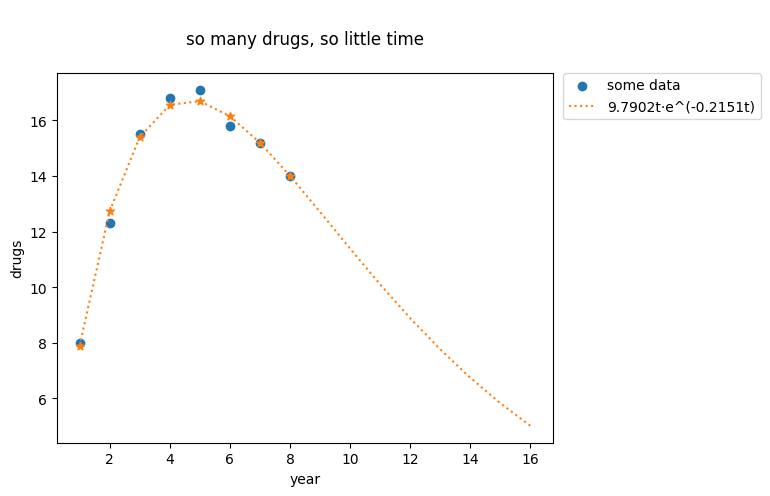

,year,drugs,model,error
0,1,8.0,7.895090,0.1049
1,2,12.3,12.733692,-0.4337
2,3,15.5,15.403268,0.0967
3,4,16.8,16.562233,0.2378
4,5,17.1,16.695376,0.4046
5,6,15.8,16.156405,-0.3564
6,7,15.2,15.200532,-0.0005
7,8,14.0,14.009351,-0.0094



coeffs: [c,k] = 2.2814,-0.2151 → y(x) = 9.7902t·e^(-0.2151t)



In [21]:
eg_11()

## miscellaney

* alternate LSQ with linear options [@scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)
* some senseless pretty stuff for plots: [markers](https://matplotlib.org/stable/api/markers_api.html), [linestyles](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html), [colors](https://matplotlib.org/stable/gallery/color/named_colors.html). (because everyone has time before midterms, right?)